This script recorded my pipeline to compare different spike sorting algorithms based on the study 'mouse_VISp_L5_128ch'.

After I created the simulated recording dataset named as 'recording_drift' in the study 'mouse_VISp_L5_128ch', I can then run several spike sorting algorithms on it.

Unfortunately, I still needed some different manual processing to handle with each spike sorting algorithms. Note that `SpikeInterface` doesn't support GPU-based algorithms on windows. Here is a table about how to run each spike sorting algorithms on Windows with default parameters according to my experience:

|Algo|How to run|
|:-:|:-:|
|Kilosort2.5|MATLAB GUI|
|Kilosort3|MATLAB GUI|
|JRCLUST|MATLAB CLI, no extractor in SpikeInterface|
|HerdingSpike2|Python SpikeInterface|
|SpyKINGCIRCUS|Python SpikeInterface|
|SpyKINGCIRCUS2|Python SpikeInterface|
|Tridesclous|Python SpikeInterface|
|Tridesclous2|Python SpikeInterface|
|Mountainsort5|Python|
|HDsort| *Failed*, need Linux CLI|
|IronClust| *Failed* with Spikeinterface on windows|
|Mountainsort4|*Failed* within algo|
|YASS|Lagacy|


In [1]:
from compare.compare import *
from utils import *

import numpy as np
import pickle as pkl
import shutil
import matplotlib.pyplot as plt

import ipywidgets as widgets

import MEArec as mr
import MEAutility as mu

import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.widgets as sw

g:\anaconda3\envs\si_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
g:\anaconda3\envs\si_env\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
g:\anaconda3\envs\si_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


First, create empty folder for every algorithm I needed to compare with.

In [3]:
algo_list = ['KS25','KS3','HS2','SC','SC2','TC','TC2','MS5']

recording_path = Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_drift')

In [ ]:
create_empty_sortings(recording_path,algo_list)

## Run each algorithm

In [47]:
print('Progress:')
widgets.VBox([widgets.Checkbox(value=False, description=algo) for algo in algo_list])

Progress:


In [5]:
# 'KS25','KS3' accept rawdata bin file. Extract the rawdata as bin file.
extract_rawdata_bin(recording_path)

KS25
- kilosort (GUI)
- create and use probe file Neuropixels20x2D128_kilosortChanMap.mat

KS3
- kilosort (GUI)
- create and use probe file Neuropixels20x2D128_kilosortChanMap.mat

In [4]:
# KS25 into Extractor
sorting_KS25 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS25').as_posix(),keep_good_only=False)

In [5]:
# KS3 into Extractor
sorting_KS3 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS3').as_posix(),keep_good_only=False)

HS2, SC, SC2, TC, TC2 can be done by SpikeInterface

In [4]:
# load recording and GT
recording,sorting_GT = se.read_mearec((recording_path / 'recordings.h5').as_posix())

In [5]:
print(ss.available_sorters())

['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'kilosort3', 'klusta', 'mountainsort4', 'pykilosort', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2', 'waveclus', 'waveclus_snippets', 'yass']


In [7]:
# HS2
output_folder= (recording_path / 'sorting_results' / 'HS2').as_posix()
sorting_HS2 = ss.run_sorter('herdingspikes', recording,
                             output_folder= output_folder,
                             verbose=True)

Warning! The recording is already filtered, but herdingspikes filter is enabled
# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 32000
# Localization On
# Number of recorded channels: 128
# Analysing frames: 960000; Seconds: 30.0
# Frames before spike in cutout: 10
# Frames after spike in cutout: 58
# tcuts: 42 90
# tInc: 100000
# Detection completed, time taken: 0:00:10.491933
# Time per frame: 0:00:00.010929
# Time per sample: 0:00:00.000085
Loaded 6320 spikes.
Fitting dimensionality reduction using all spikes...
...projecting...
...done
Clustering...
Clustering 6320 spikes...
number of seeds: 82
seeds/job: 11
using 8 cpus


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    6.9s remaining:   11.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    7.3s finished
g:\anaconda3\envs\si_env\lib\site-packages\herdingspikes\clustering\mean_shift_.py:242: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  unique = np.ones(len(sorted_centers), dtype=np.bool)
g:\anaconda3\envs\si_env\lib\site-packages\herdingspikes\clustering\mean_shift_.py:255: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warni

Number of estimated units: 25
Saving to studies\mouse_VISp_L5_128ch\recordings\recording_drift\sorting_results\HS2\sorter_output\HS2_sorted.hdf5
herdingspikes run time 23.19s


In [7]:
# SC
output_folder= (recording_path / 'sorting_results' / 'SC').as_posix()
sorting_SC = ss.run_sorter('spykingcircus', recording,
                             output_folder= output_folder,
                             verbose=True)

Warning! The recording is already filtered, but spykingcircus filter is enabled
RUNNING SHELL SCRIPT: studies\mouse_VISp_L5_128ch\recordings\recording_drift\sorting_results\SC\sorter_output\run_spykingcircus.bat


(si_env) g:\JHU\Study\Biomedical_Data_Design\neurosim>spyking-circus studies\mouse_VISp_L5_128ch\recordings\recording_drift\sorting_results\SC\sorter_output\recording.npy -c 4 

G:\anaconda3\envs\si_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:

G:\anaconda3\envs\si_env\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll

G:\anaconda3\envs\si_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll

  warnings.warn("loaded more than 1 DLL from .libs:"



##################################################################

#####             Welcome to the SpyKING CIRCUS              #####

#####                 (1.1.0+16.g38bd5b7f)   

In [8]:
# SC2
output_folder= (recording_path / 'sorting_results' / 'SC2').as_posix()
sorting_SC2 = ss.run_sorter('spykingcircus2', recording,
                             output_folder= output_folder,
                             verbose=True)

detect peaks with n_jobs = 1 and chunk_size = 32000


detect peaks:   0%|          | 0/30 [00:00<?, ?it/s]

We found 10734 peaks in total
We kept 10734 peaks for clustering
features_from_peaks with n_jobs = 1 and chunk_size = 32000


features_from_peaks:   0%|          | 0/30 [00:00<?, ?it/s]

We found 28 raw clusters, starting to clean with matching...
extract waveforms memmap with n_jobs = 1 and chunk_size = 32000


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

We kept 27 non-duplicated clusters...
extract waveforms memmap with n_jobs = 1 and chunk_size = 32000


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

find spikes (circus-omp) with n_jobs = 1 and chunk_size = 3200


find spikes (circus-omp):   0%|          | 0/300 [00:00<?, ?it/s]

We found 13684 spikes
spykingcircus2 run time 149.16s


In [9]:
# TC
output_folder= (recording_path / 'sorting_results' / 'TC').as_posix()
sorting_TC = ss.run_sorter('tridesclous', recording,
                             output_folder= output_folder,
                             verbose=True)

Local copy of recording


write_binary_recording:   0%|          | 0/30 [00:00<?, ?it/s]

DataIO <id: 3143985307904> 
  workdir: studies\mouse_VISp_L5_128ch\recordings\recording_drift\sorting_results\TC\sorter_output
  sample_rate: 32000.0
  total_channel: 128
  channel_groups: 0 [ch0 ch1 ch2 ch3 ... ch124 ch125 ch126 ch127]
  nb_segment: 1
  length: 960000
  durations: 30.0 s.
catalogue_nested_params
{'chunksize': 32000,
 'clean_cluster': {'apply_auto_merge_cluster': True,
                   'apply_auto_split': True,
                   'apply_trash_low_extremum': True,
                   'apply_trash_not_aligned': True,
                   'apply_trash_small_cluster': True},
 'clean_peaks': {'alien_value_threshold': -1.0, 'mode': 'extremum_amplitude'},
 'cluster_kargs': {'adjacency_radius_um': 50.0,
                   'high_adjacency_radius_um': 30.0,
                   'max_loop': 2560,
                   'min_cluster_size': 20},
 'cluster_method': 'pruningshears',
 'duration': 30.0,
 'extract_waveforms': {'wf_left_long_ms': -2.5,
                       'wf_left_ms': -1.0,

In [10]:
# TC2
output_folder= (recording_path / 'sorting_results' / 'TC2').as_posix()
sorting_TC2 = ss.run_sorter('tridesclous2', recording,
                             output_folder= output_folder,
                             verbose=True)

detect peaks:   0%|          | 0/30 [00:00<?, ?it/s]

We found 11957 peaks in total
We kept 11957 peaks for clustering


localize peaks:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

g:\anaconda3\envs\si_env\lib\site-packages\spikeinterface\postprocessing\template_tools.py:24: DeprecationWarning: The spikeinterface.postprocessing.template_tools is submodule is deprecated.Use spikeinterface.core.template_tools instead
  _warn()
g:\anaconda3\envs\si_env\lib\site-packages\spikeinterface\postprocessing\template_tools.py:25: DeprecationWarning: The 'get_template_channel_sparsity()' function is deprecated. Use 'compute_sparsity()' instead
  return tt.get_template_channel_sparsity(*args, **kwargs)
g:\anaconda3\envs\si_env\lib\site-packages\spikeinterface\postprocessing\template_tools.py:19: DeprecationWarning: The spikeinterface.postprocessing.template_tools is submodule is deprecated.Use spikeinterface.core.template_tools instead
  _warn()


find spikes (tridesclous):   0%|          | 0/30 [00:00<?, ?it/s]

We found 9134 spikes
tridesclous2 run time 154.62s


In [8]:
# MS5

import mountainsort5 as ms5

# Make sure the recording is preprocessed appropriately
# lazy preprocessing
MS5_recording_filtered = spre.bandpass_filter(recording, freq_min=300, freq_max=6000)
MS5_recording_preprocessed: si.BaseRecording = spre.whiten(MS5_recording_filtered)

# use scheme 1
sorting_MS5 = ms5.sorting_scheme1(
    recording=MS5_recording_preprocessed,
    sorting_parameters=ms5.Scheme1SortingParameters()
)

sorting_MS5.save(folder=(recording_path / 'sorting_results' / 'MS5' / 'ms5').as_posix())

Number of channels: 128
Number of timepoints: 960000
Sampling frequency: 32000.0 Hz
Channel 0: [ -16.  -472.5]
Channel 1: [ -16.  -457.5]
Channel 2: [ -16.  -442.5]
Channel 3: [ -16.  -427.5]
Channel 4: [ -16.  -412.5]
Channel 5: [ -16.  -397.5]
Channel 6: [ -16.  -382.5]
Channel 7: [ -16.  -367.5]
Channel 8: [ -16.  -352.5]
Channel 9: [ -16.  -337.5]
Channel 10: [ -16.  -322.5]
Channel 11: [ -16.  -307.5]
Channel 12: [ -16.  -292.5]
Channel 13: [ -16.  -277.5]
Channel 14: [ -16.  -262.5]
Channel 15: [ -16.  -247.5]
Channel 16: [ -16.  -232.5]
Channel 17: [ -16.  -217.5]
Channel 18: [ -16.  -202.5]
Channel 19: [ -16.  -187.5]
Channel 20: [ -16.  -172.5]
Channel 21: [ -16.  -157.5]
Channel 22: [ -16.  -142.5]
Channel 23: [ -16.  -127.5]
Channel 24: [ -16.  -112.5]
Channel 25: [-16.  -97.5]
Channel 26: [-16.  -82.5]
Channel 27: [-16.  -67.5]
Channel 28: [-16.  -52.5]
Channel 29: [-16.  -37.5]
Channel 30: [-16.  -22.5]
Channel 31: [-16.   -7.5]
Channel 32: [-16.    7.5]
Channel 33: [-16. 

NpzFolderSorting: 29 units - 1 segments - 32.0kHz

## Comparing

In [2]:
algo_list = ['KS25','KS3','HS2','SC','SC2','TC','TC2','MS5']

recording_path = Path().joinpath('studies','mouse_VISp_L5_128ch','recordings','recording_drift')

# load GT
recording,sorting_GT = se.read_mearec((recording_path / 'recordings.h5').as_posix())
# load sorting results
sorting_KS25 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS25').as_posix(),keep_good_only=False)
sorting_KS3 = se.KiloSortSortingExtractor((recording_path / 'sorting_results' / 'KS3').as_posix(),keep_good_only=False)

sorting_HS2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'HS2').as_posix())
sorting_SC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC').as_posix())
sorting_SC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'SC2').as_posix())
sorting_TC = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC').as_posix())
sorting_TC2 = ss.read_sorter_folder((recording_path / 'sorting_results' / 'TC2').as_posix())

# sorting_MS5
sorting_MS5 = ss.NpzSortingExtractor.load_from_folder((recording_path / 'sorting_results' / 'MS5'/'ms5').as_posix())

## Comparing spike trains

In [5]:
# get GT spike time
# get algo spike time

analysis_list = ['GT','KS25','KS3','HS2','SC','SC2','TC','TC2','MS5']
for anal in analysis_list:
    locals()["spiketime_"+anal] = get_spike_time_byUnitList(locals()["sorting_"+anal])

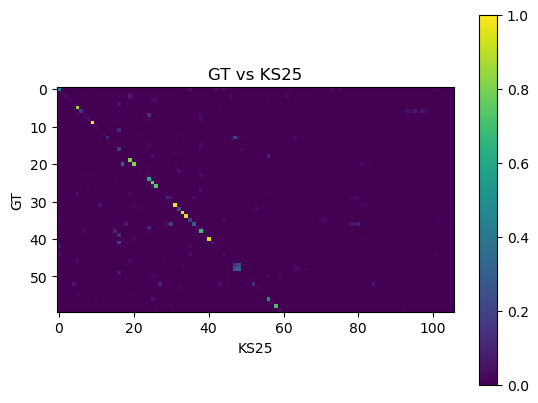

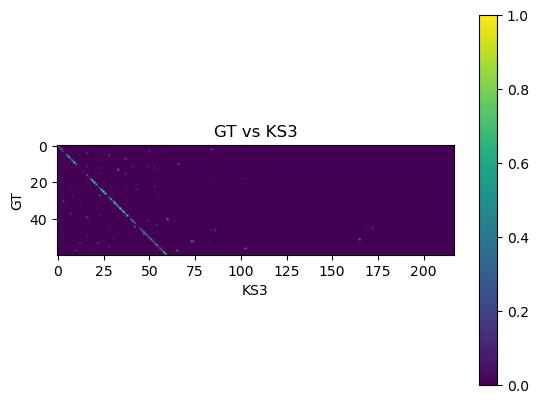

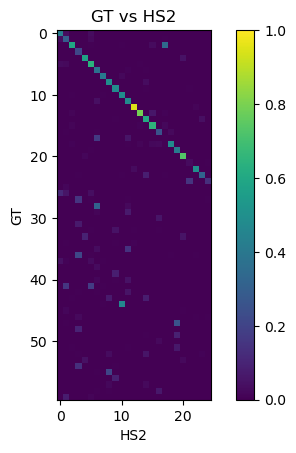

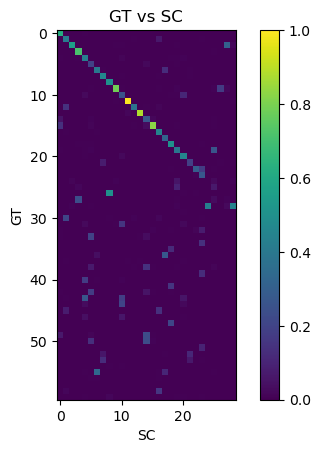

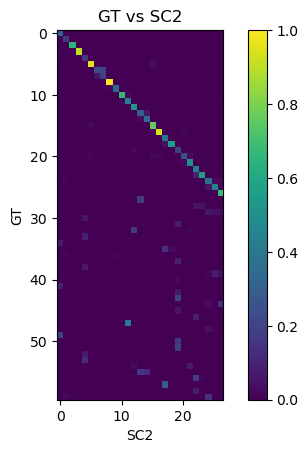

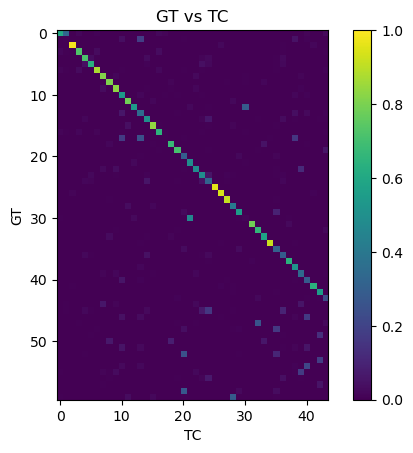

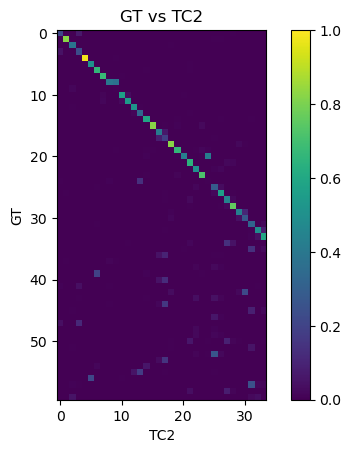

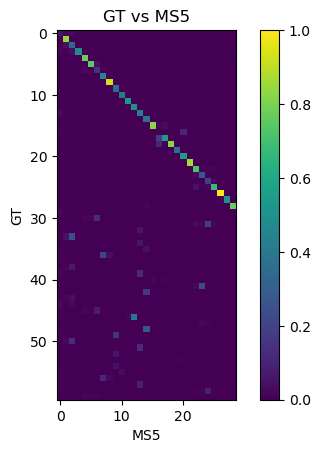

In [5]:
# time_agreement_matrix
fs = sorting_GT.sampling_frequency
tol = 0.1e-3
for algo in algo_list:
    time_agreement = time_agreement_matrix(spiketime_GT,locals()["spiketime_"+algo],fs,0.1e-3)
    plt.figure()
    plt.imshow(matrix_diagmax_sort(time_agreement))
    plt.title(f'GT vs {algo}')
    plt.xlabel(algo)
    plt.ylabel('GT')
    plt.colorbar()
    plt.clim([0,1])
    plt.show()

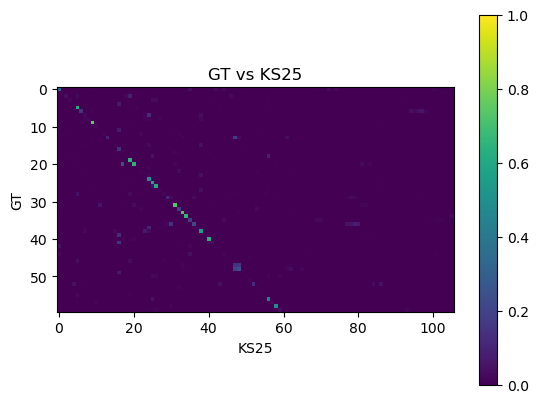

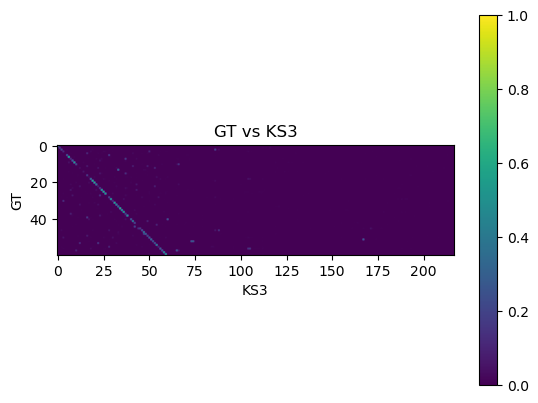

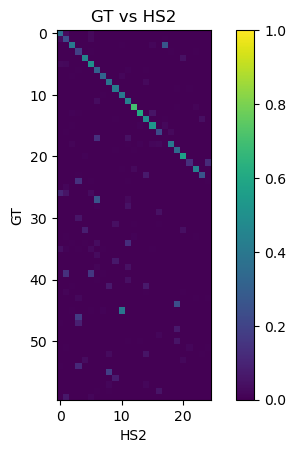

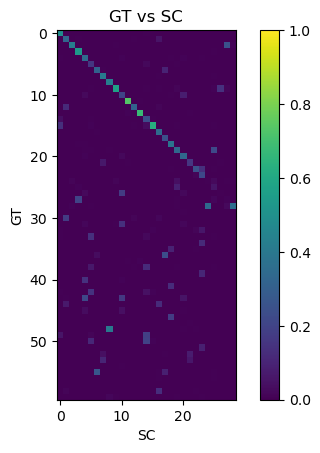

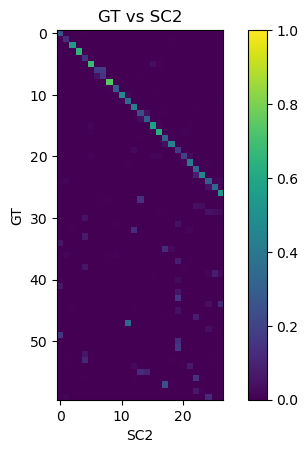

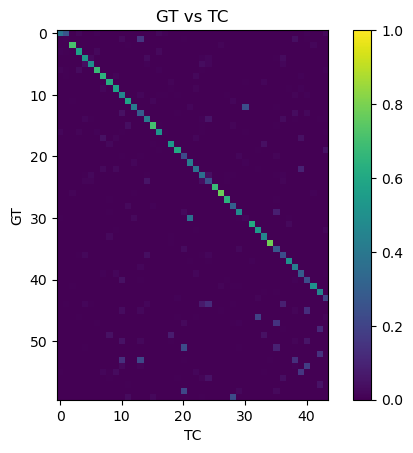

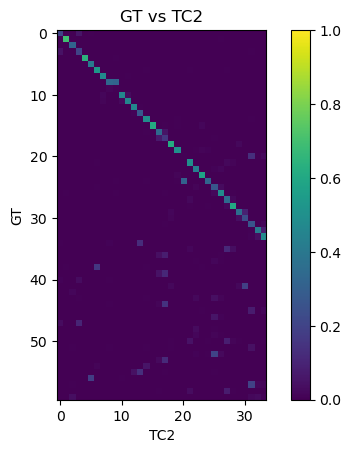

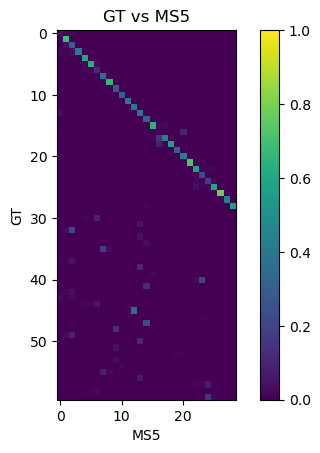

In [5]:
# spike train jaccard score matrix, similar to time agreement, but slow
fs = sorting_GT.sampling_frequency
N = recording.get_num_samples()
deltaT = 0.2e-3

for algo in algo_list:
    jaccard_matrix = jaccard_score_matrix(time2train_byUnitList(spiketime_GT,fs,N,deltaT),time2train_byUnitList(locals()["spiketime_"+algo],fs,N,deltaT))
    plt.figure()
    plt.imshow(matrix_diagmax_sort(jaccard_matrix))
    plt.title(f'GT vs {algo}')
    plt.xlabel(algo)
    plt.ylabel('GT')
    plt.colorbar()
    plt.clim([0,1])
    plt.show()

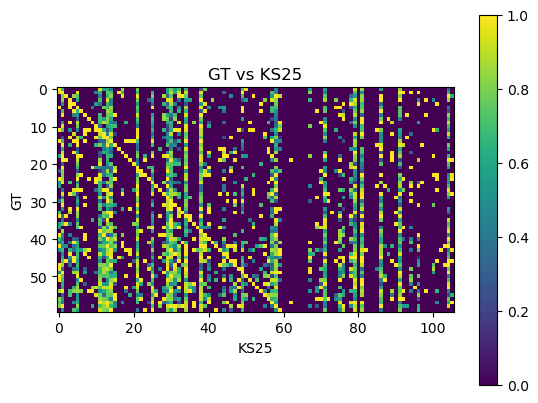

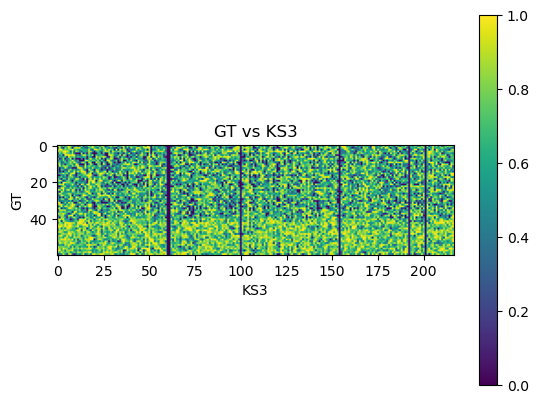

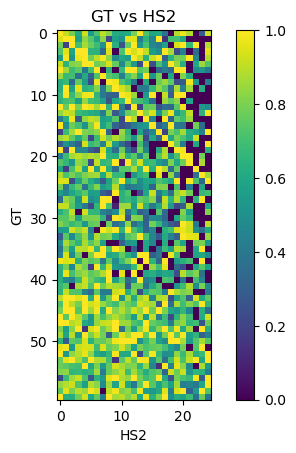

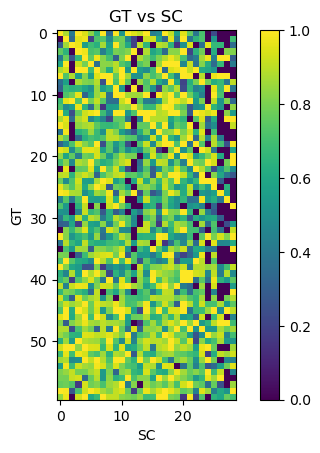

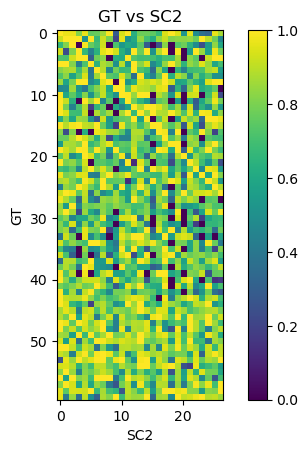

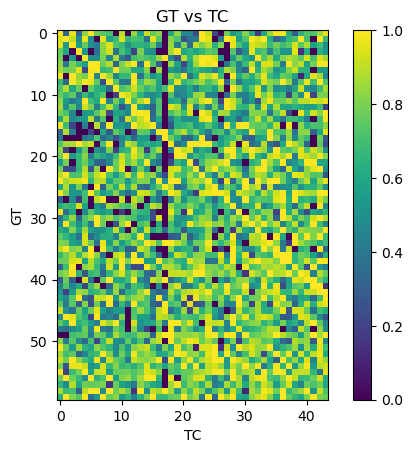

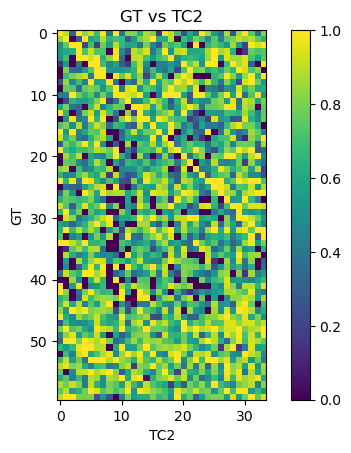

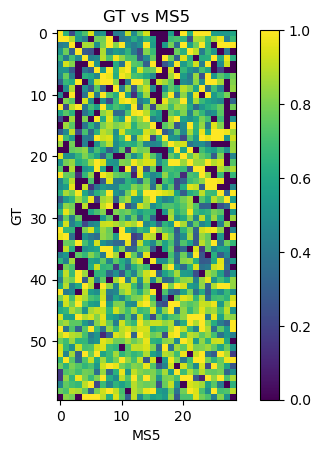

In [7]:
# CCG from pykilosort
fs = sorting_GT.sampling_frequency
nbins = 500
tbin = 1e-3
N = recording.get_num_samples()
for algo in algo_list:
    ccg_score = ccg_matrix(spiketime_GT,locals()["spiketime_"+algo],fs,nbins,tbin,N)
    plt.figure()
    plt.imshow(matrix_diagmax_sort(ccg_score))
    plt.title(f'GT vs {algo}')
    plt.xlabel(algo)
    plt.ylabel('GT')
    plt.colorbar()
    plt.clim([0,1])
    plt.show()

## Comparing template waveforms

In [3]:
from spikeinterface.core import WaveformExtractor

# get GT template waveforms
templates_GT = get_GT_templates(recording_path,ms_before=1,ms_after=2)

In [4]:
# get algo template waveforms
for algo in algo_list:
    we = WaveformExtractor(recording,locals()["sorting_"+algo],(recording_path / 'sorting_results' / algo).as_posix()) # 'waveforms'
    we.set_params(ms_before=1,ms_after=2,max_spikes_per_unit=1000)
    we.run_extract_waveforms()
    locals()["templates_"+algo] = we.get_all_templates().transpose((0,2,1)) # waveforms_algo (num_units, num_channels, num_samples)


extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

extract waveforms memmap:   0%|          | 0/30 [00:00<?, ?it/s]

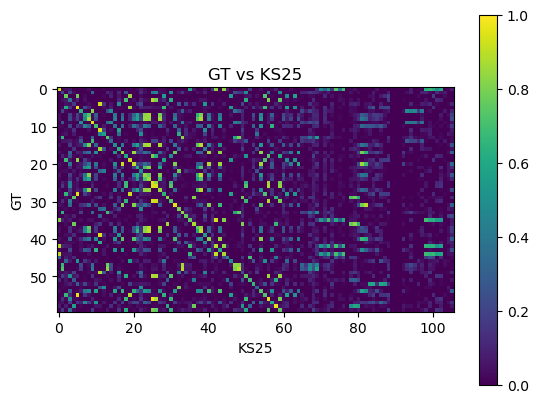

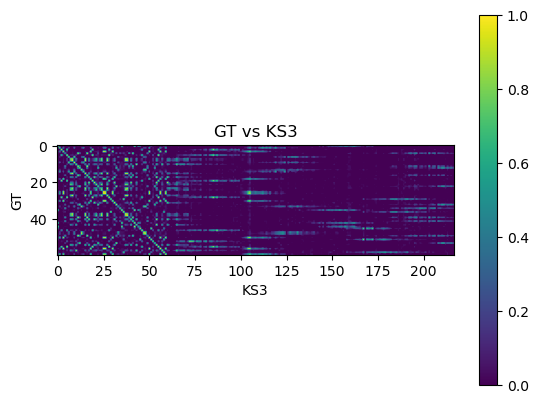

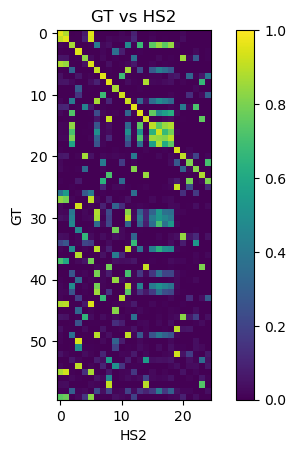

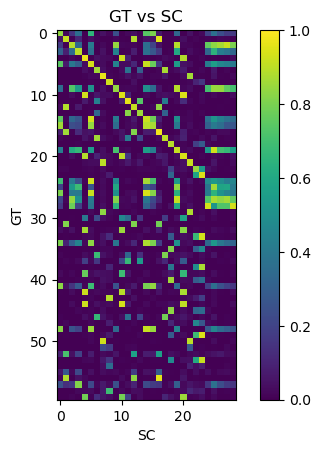

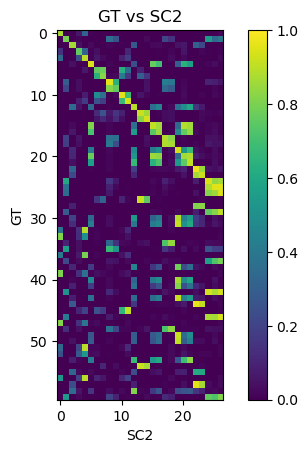

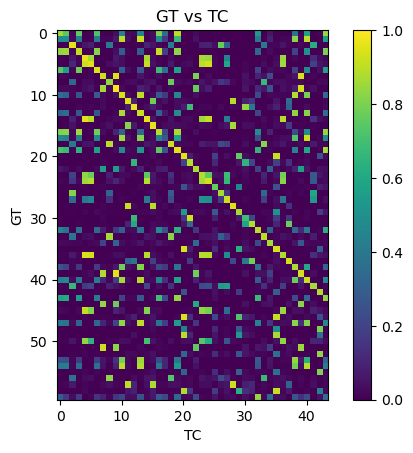

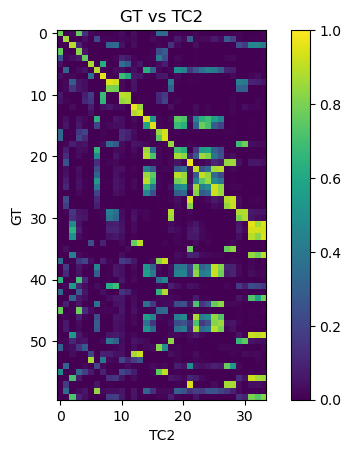

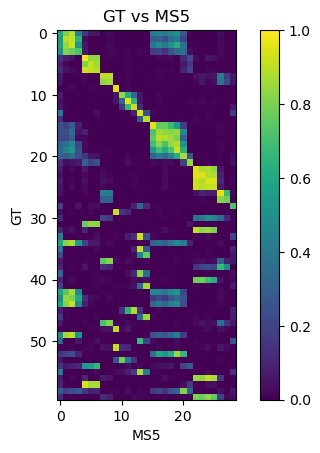

In [7]:
# cosine similarity matrix

for algo in algo_list:
    cos_sim = cosine_similarity_matrix(templates_GT,locals()["templates_"+algo])
    plt.figure()
    plt.imshow(matrix_diagmax_sort(cos_sim))
    plt.title(f'GT vs {algo}')
    plt.xlabel(algo)
    plt.ylabel('GT')
    plt.colorbar()
    plt.clim([0,1])
    plt.show()

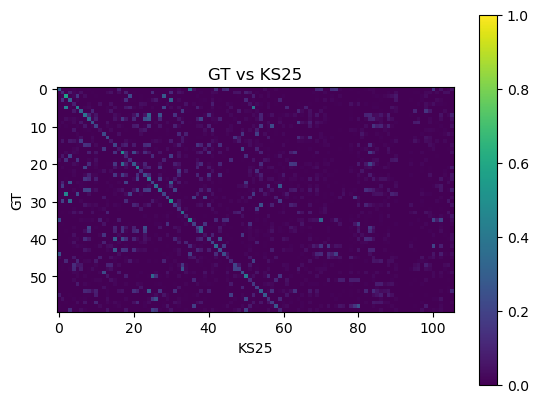

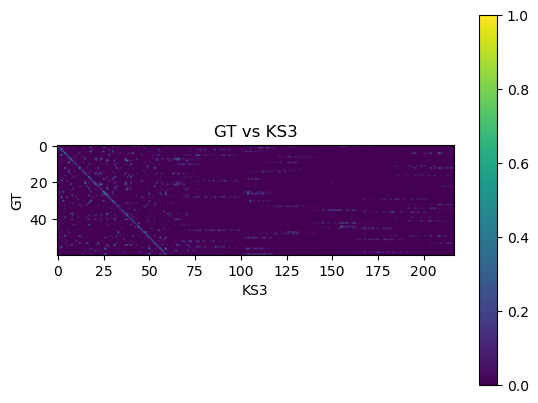

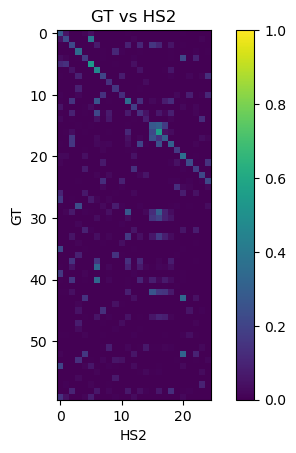

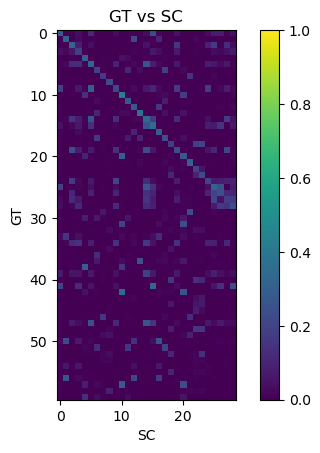

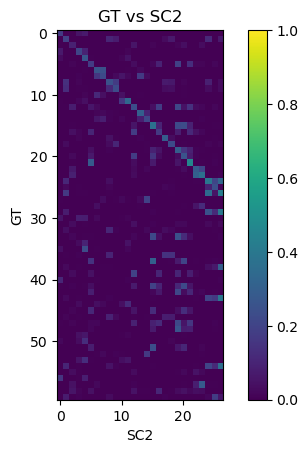

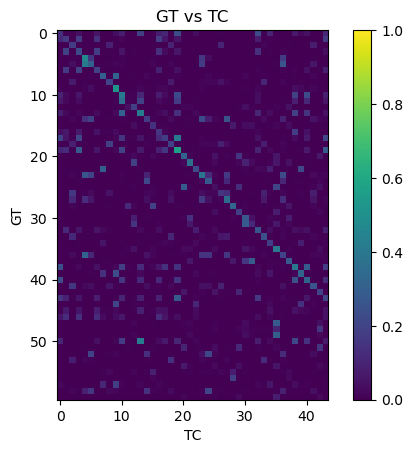

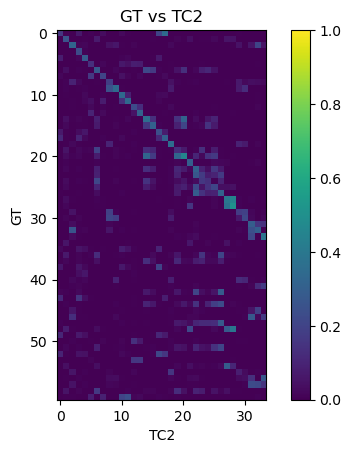

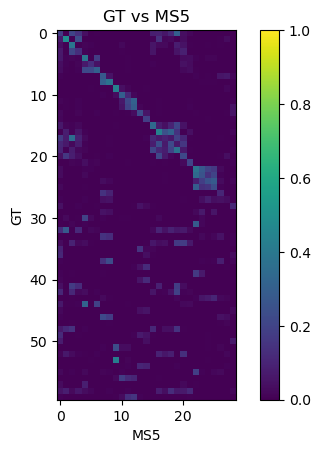

In [5]:
# simscore (from pykilosort)

for algo in algo_list:
    simscore = simscore_matrix(templates_GT,locals()["templates_"+algo])
    plt.figure()
    plt.imshow(matrix_diagmax_sort(simscore))
    plt.title(f'GT vs {algo}')
    plt.xlabel(algo)
    plt.ylabel('GT')
    plt.colorbar()
    plt.clim([0,1])
    plt.show()